### importing libraries:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.cluster import KMeans # this import our k Means algorthim to cluster
from sklearn.preprocessing import MinMaxScaler # this import scaler to scale to scale features if needed

In [2]:
# Loading our data:

df = pd.read_csv("Mall_Customers-Copy1.csv")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data preprocessing and analysis:

In [3]:
# check how many rows & columns we have:
df.shape

(200, 5)

In [4]:
# Statistical summary:
df.describe().round()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.0,200.0,200.0,200.0
mean,100.0,39.0,61.0,50.0
std,58.0,14.0,26.0,26.0
min,1.0,18.0,15.0,1.0
25%,51.0,29.0,42.0,35.0
50%,100.0,36.0,62.0,50.0
75%,150.0,49.0,78.0,73.0
max,200.0,70.0,137.0,99.0


In [5]:
# More information about the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Check for missing values:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# Check for duplicated value:
df.duplicated().sum()

0

<AxesSubplot:xlabel='Gender', ylabel='count'>

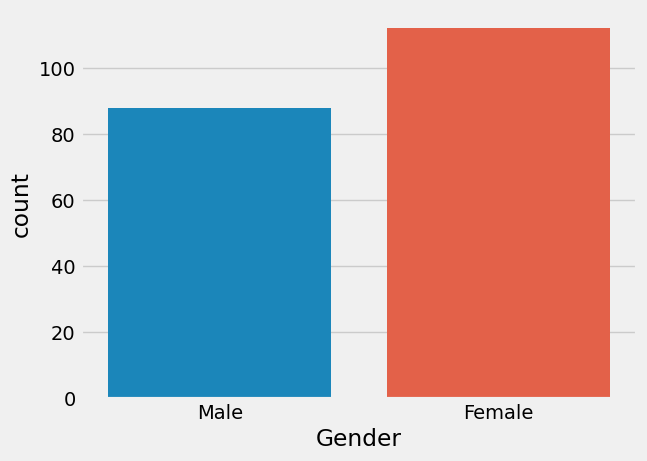

In [8]:
# Check for count of each gender we have:

sns.countplot(x = "Gender", data = df)

In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
# Check for the average of "Annual Income" & "Spending Score" for each gender:

gen_grp = df.groupby("Gender")

gen_agg = gen_grp["Annual Income (k$)","Spending Score (1-100)"].agg("mean")#.round()

gen_agg.reset_index(inplace = True)

print("the average of 'Annual Income' & 'Spending Score' for each gender:\n\n",gen_agg)

the average of 'Annual Income' & 'Spending Score' for each gender:

    Gender  Annual Income (k$)  Spending Score (1-100)
0  Female           59.250000               51.526786
1    Male           62.227273               48.511364


C:\Users\User\AppData\Local\Temp\ipykernel_16268\3116591090.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gen_agg = gen_grp["Annual Income (k$)","Spending Score (1-100)"].agg("mean")#.round()


### Preprocessing for machine learning:

In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
# first we will drop the columns we don't need:

newdf = df.drop(columns =["CustomerID","Gender","Age"])
newdf.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [13]:
# Storing the "Annual Income (k$)" & "Spending Score (1-100)" values in x variable:
x = newdf.values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

### Choosing the number of clusters:

In [14]:
# we will use the WCSS to choose the right number of clusters:
# we will choose the number of clusters with the lowest possible "WCSS" value.

wcss = []

for i in range(1,11):
    
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 42)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)

C:\Users\User\anaconda4new\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


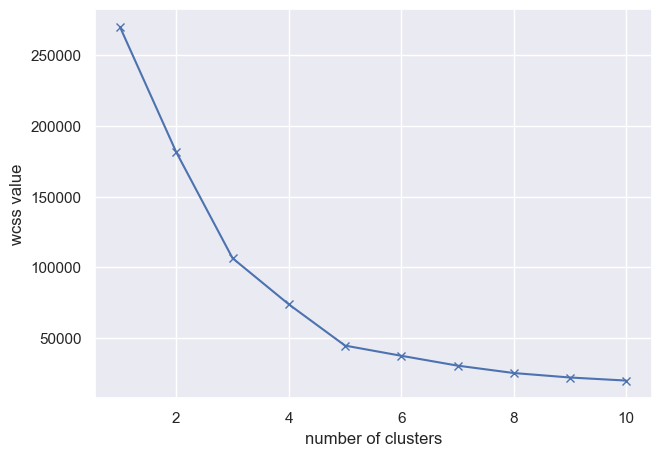

In [15]:
# plot an elbow graph to show each number of clusters alongside with the "wcss" value:

sns.set()
plt.plot(range(1,11), wcss, marker="x")

plt.xlabel("number of clusters")
plt.ylabel("wcss value");

### Based on the graph above, the optimum number of clusters is (5)

### Training the model:

In [16]:
# now we pass the optimum number of clusters to "n_clusters" variable:
kmeans = KMeans(n_clusters= 5, init = "k-means++", random_state = 0)

# we need to return a label for each data point based on their clusters
y = kmeans.fit_predict(x)

print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [17]:
# appending the clustre's labels to our data frame:
newdf["Cluster"] = y

newdf.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


### Visualizing the clusters:

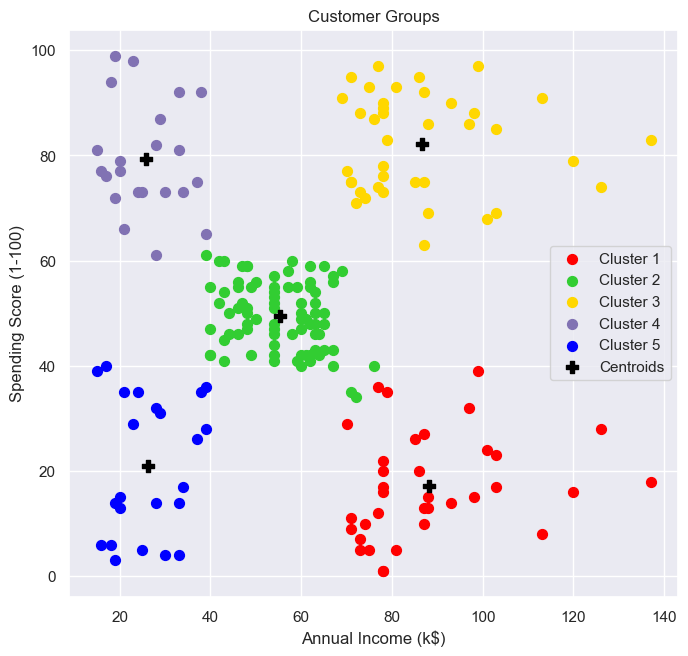

In [18]:
# first: plot all the data point and all clusters:

plt.figure(figsize=(7,7))
plt.scatter(x[y==0,0], x[y==0,1], s=50, c="red", label="Cluster 1")
plt.scatter(x[y==1,0], x[y==1,1], s=50, c="limegreen", label="Cluster 2")
plt.scatter(x[y==2,0], x[y==2,1], s=50, c="gold", label="Cluster 3")
plt.scatter(x[y==3,0], x[y==3,1], s=50, c="m", label="Cluster 4")
plt.scatter(x[y==4,0], x[y==4,1], s=50, c="blue", label="Cluster 5")

# second: plot the centroids points:

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=70, c="black", label="Centroids",
            marker="P")


plt.title("Customer Groups")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()